In [70]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import scipy
import random
%matplotlib inline

In [32]:
x = np.linspace(-5, 5, 100)
mu = 0
sigma_sq = 1
alpha = 0.05

In [33]:
norm_ = sts.norm.pdf(x, scale=sigma_sq, loc=mu)

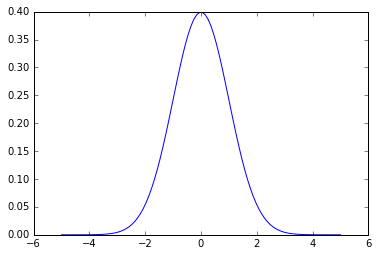

In [34]:
plt.plot(x, norm_)

In [35]:
print(sts.norm.cdf(1 - alpha / 2 , scale=1), sts.norm.cdf(0.025, scale=1))

0.83521987002 0.509972518195


In [37]:
print(sts.norm.interval(0.997))

(-2.9677379253417833, 2.9677379253417717)


5. 
В пятилетнем рандомизированном исследовании Гарвардской медицинской школы 11037 испытуемых через день принимали аспирин, а ещё 11034 — плацебо. Исследование было слепым, то есть, испытуемые не знали, что именно они принимают.

За 5 лет инфаркт случился у 104 испытуемых, принимавших аспирин, и у 189 принимавших плацебо.

In [105]:
189/11034 - prob_for_asp

0.0077060239760047815

In [45]:
prob_for_asp = 104/11037

In [104]:
prob_for_asp

0.009422850412249705

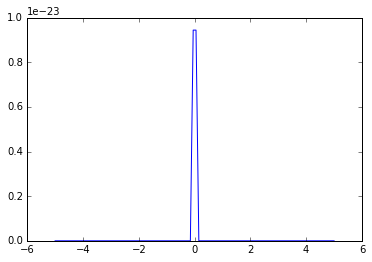

In [48]:
plt.plot(x, sts.norm.pdf(x, scale=prob_for_asp))

In [49]:
shans = prob_for_asp / (1 - prob_for_asp)

In [52]:
((189/11034)/(1 - 189/11034)) / shans

1.8320539419087138

In [61]:
def proportions_confint_diff_ind(sample1, sample2, alpha = 0.05):    
    z = scipy.stats.norm.ppf(1 - alpha / 2.)   
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (left_boundary, right_boundary)

In [62]:
sample_aspirin = np.zeros_like(np.arange(11037))
sample_placebo = np.zeros_like(np.arange(11034))

In [63]:
for i in range(104):
    sample_aspirin[i] = 1
for i in range(189):
    sample_placebo[i] = 1

In [66]:
round(proportions_confint_diff_ind(sample_placebo, sample_aspirin)[1], 4)

0.010699999999999999

In [95]:
def get_bootstrap_samples(data, n_samples):
    random.seed(0)
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [96]:
random.seed(0)

In [97]:
random.seed(0)
psevdo_samples_asp = get_bootstrap_samples(sample_aspirin, 1000)
psevdo_samples_plac = get_bootstrap_samples(sample_placebo, 1000)

In [98]:
psevdo_samples_asp.shape

(1000, 11037)

In [99]:
diff_chance = lambda x, y: ((np.sum(x)/len(x))/(1 - np.sum(x)/len(x)))/((np.sum(y)/len(y))/(1 - np.sum(y)/len(y)))

In [100]:
diff_chance(sample_placebo, sample_aspirin)

1.8320539419087138

In [101]:
stat = list(map(diff_chance, psevdo_samples_plac, psevdo_samples_asp))

In [102]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [103]:
stat_intervals(stat, 0.05)

array([ 1.43131124,  2.36274768])